<a href="https://colab.research.google.com/github/nusrat-khan-13/Spotify-Data-Analysis/blob/main/Stock_Market_Analysis_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [9]:
#For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [10]:
pip install pandas_datareader

In [11]:
pip install yfinance

In [12]:
#For time stamps
from datetime import datetime

In [13]:
#The tech stocks used for this analysis
tech_list= ['AAPL','GOOG','MSFT','AMZN']

#Set up End and Start times for Data Grab
tech_list= ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(20)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-05,180.100006,181.500000,178.750000,181.279999,181.279999,32116400,AMAZON
2024-06-06,181.750000,185.000000,181.490005,185.000000,185.000000,31371200,AMAZON
2024-06-07,184.899994,186.289993,183.360001,184.300003,184.300003,28021500,AMAZON
2024-06-10,184.070007,187.229996,183.789993,187.059998,187.059998,34494500,AMAZON
2024-06-11,187.059998,187.770004,184.539993,187.229996,187.229996,27265100,AMAZON
2024-06-12,188.020004,188.350006,185.429993,186.889999,186.889999,33984200,AMAZON
2024-06-13,186.089996,187.669998,182.669998,183.830002,183.830002,39721500,AMAZON
2024-06-14,183.080002,183.720001,182.229996,183.660004,183.660004,25456400,AMAZON
2024-06-17,182.520004,185.000000,181.220001,184.059998,184.059998,35601900,AMAZON


In [14]:
#Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,184.401468,186.006270,182.938770,184.491706,184.026902,6.033096e+07
std,11.341931,11.526205,11.221791,11.404021,11.456076,2.474195e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,174.801842,4.678918e+07
50%,183.735001,185.119995,182.014999,183.989998,183.502808,5.368500e+07
75%,191.452503,192.684998,190.247505,191.477497,190.970264,6.615335e+07
max,220.000000,221.550003,219.029999,221.550003,221.550003,2.464214e+08


In [15]:
#General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-05 to 2024-07-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


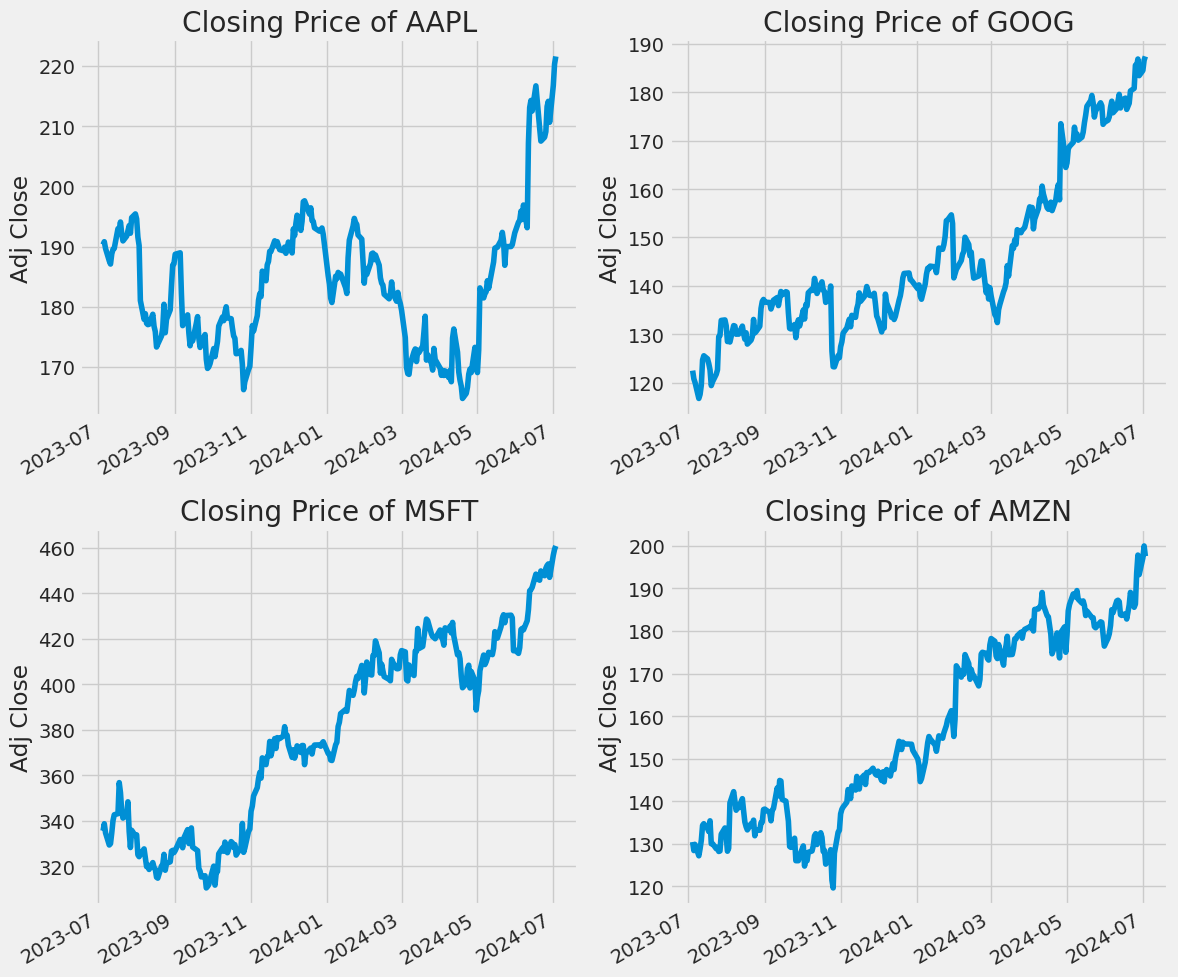

In [16]:
#Historical view of the closing Price
plt.figure(figsize=(12,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

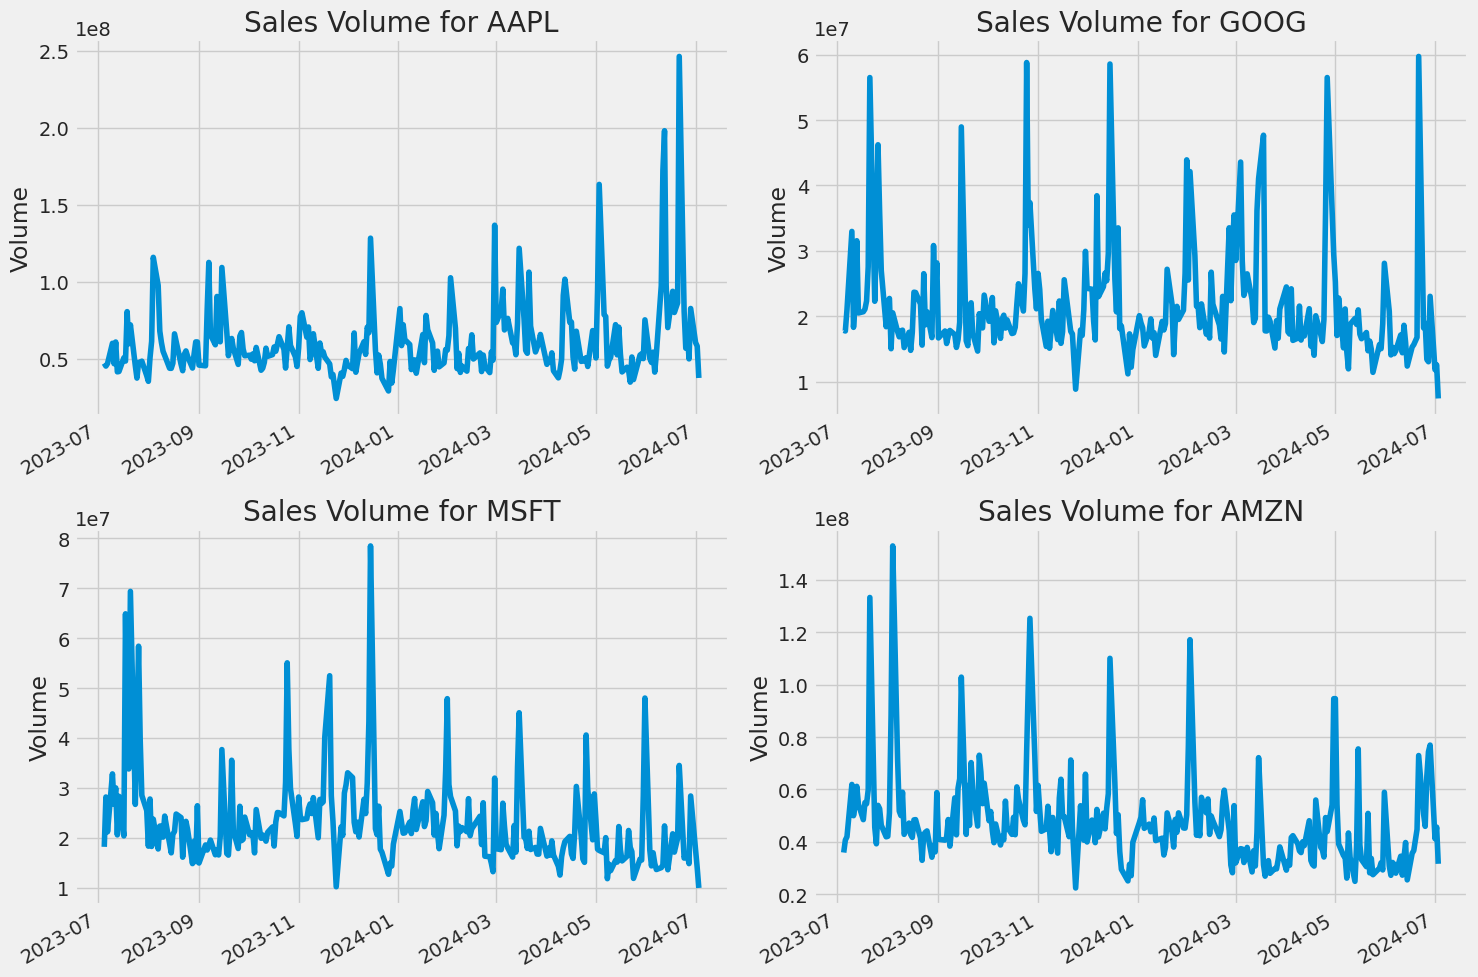

In [17]:
#Total Volume of Stock being traded each day

plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")

plt.tight_layout()

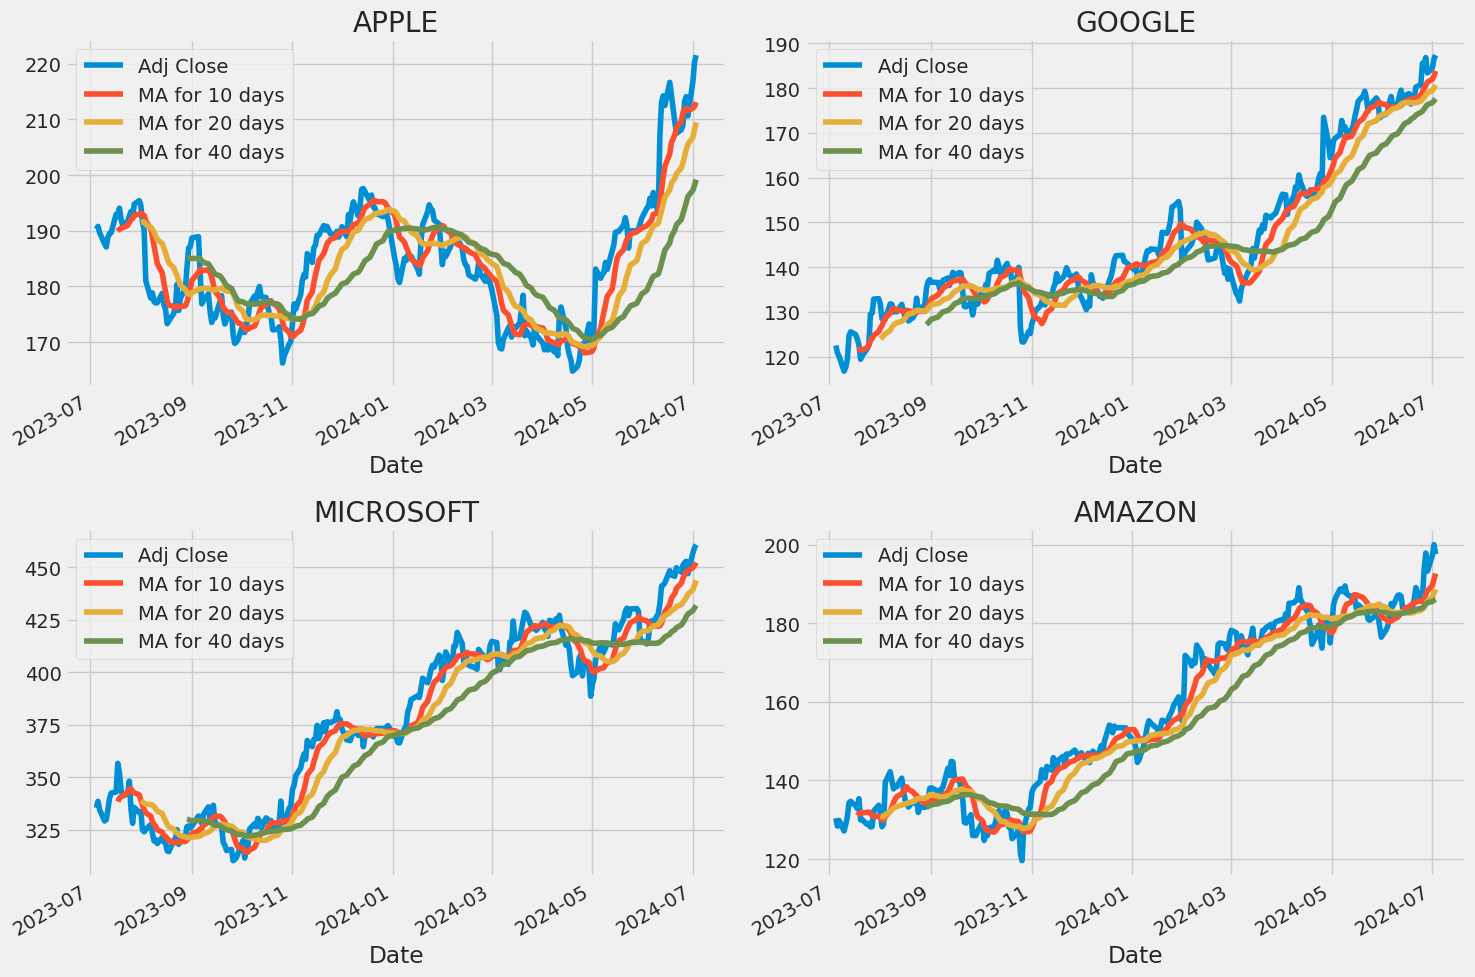

In [18]:
#Moving Average of the Various Stocks

ma_day = [10, 20, 40]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 40 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 40 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 40 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 40 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

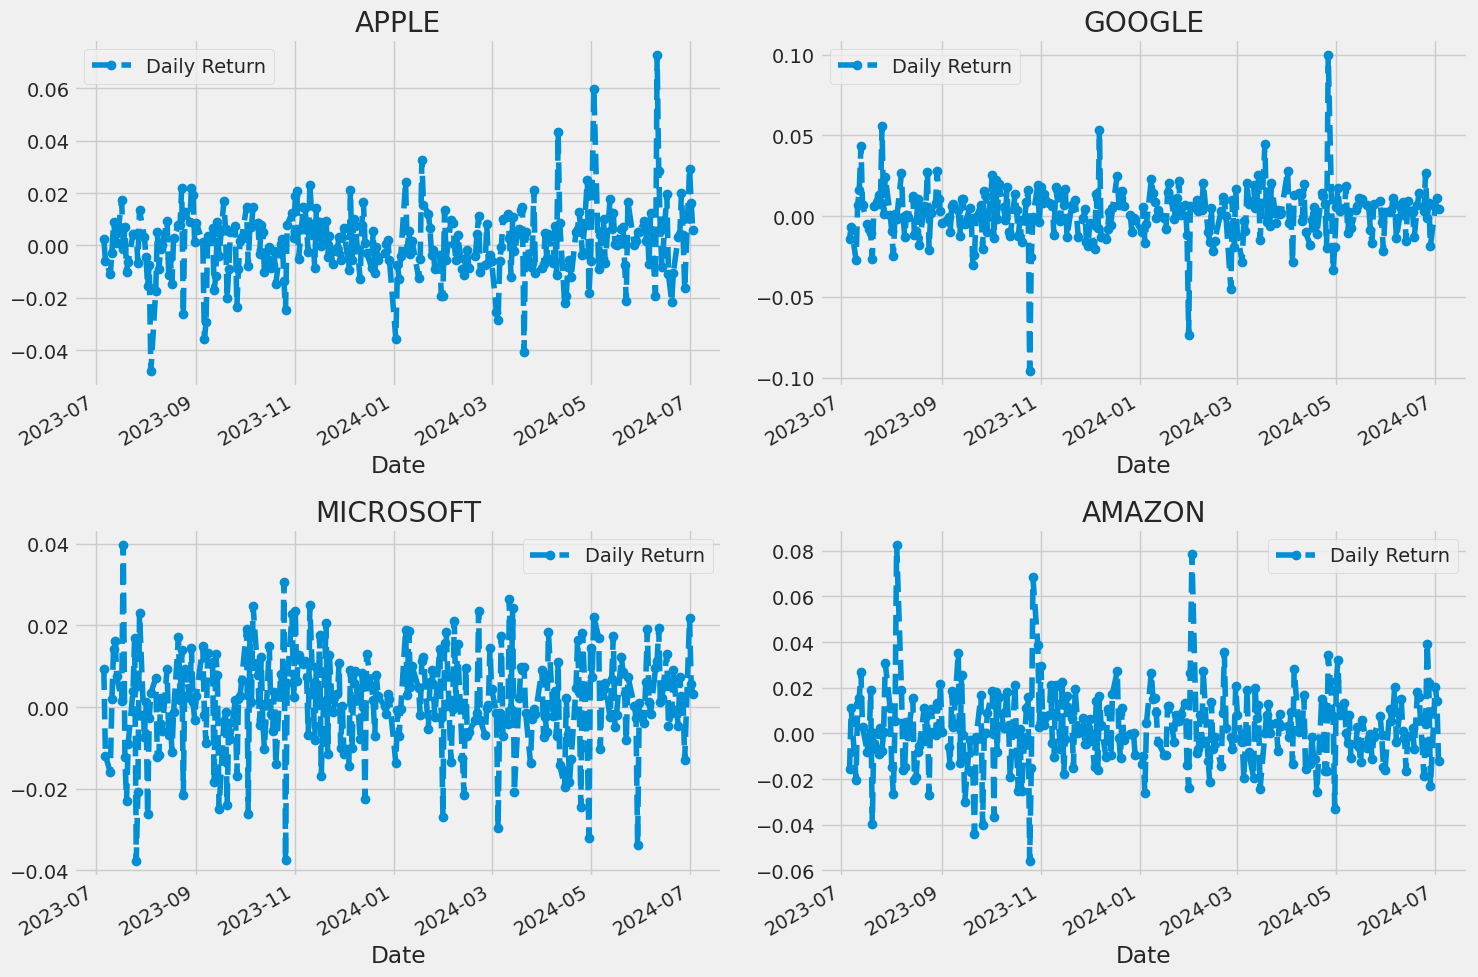

In [19]:
#pct_change to find the percent change for each day

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

#plot daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend = True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend = True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend = True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend = True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

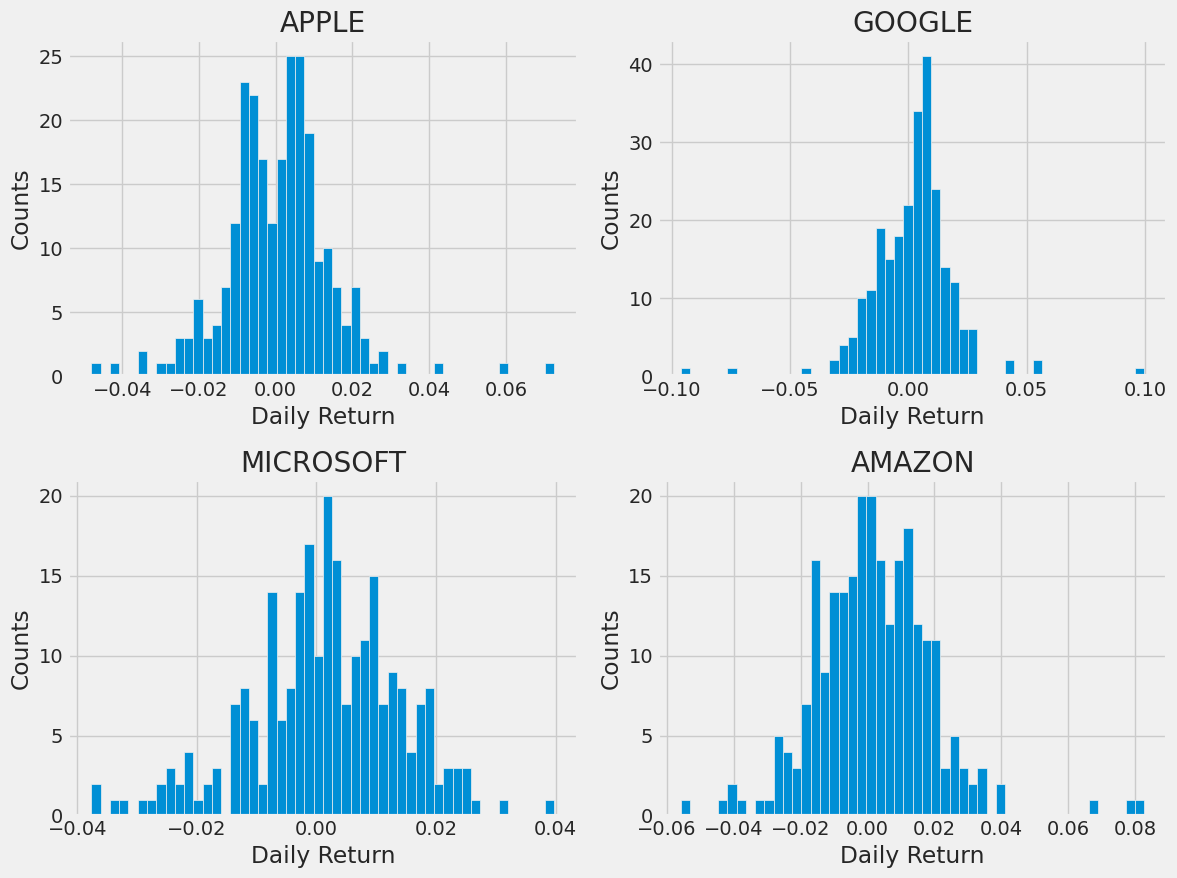

In [20]:
#using seaborn create histogram and kde plot on the same fig

plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()


In [21]:
#All the Closing prices for the tech stock list into one dataframe

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

#make a new tech returns dataframe
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-05,NaN,NaN,NaN,NaN
2023-07-06,0.002509,-0.015493,-0.013863,0.009227
2023-07-07,-0.005891,0.011063,-0.006533,-0.011867
2023-07-10,-0.010856,-0.020419,-0.027218,-0.015984
2023-07-11,-0.002810,0.012979,0.007187,0.001929


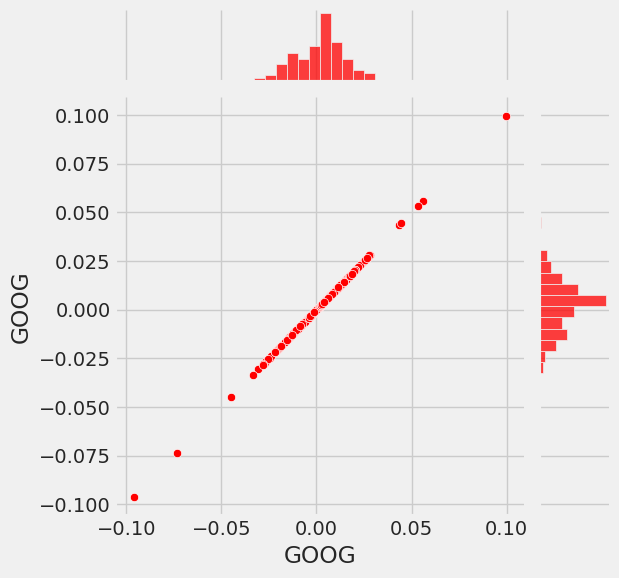

In [22]:
#Comparing Google to itself to show perfectly linear relationship

sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='red')


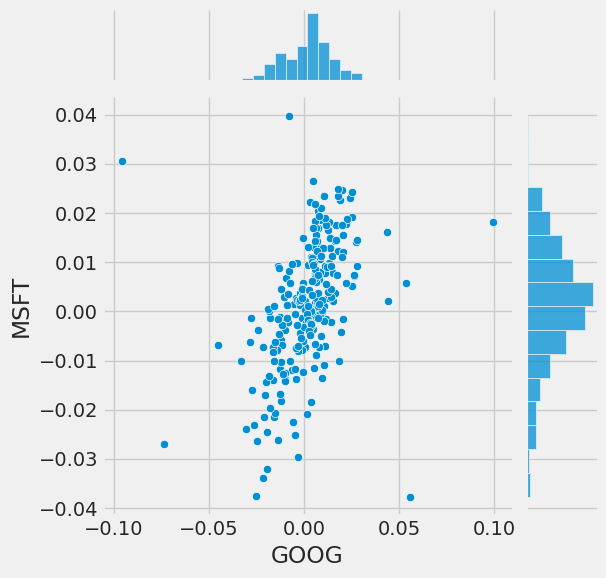

In [23]:
#use joinplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

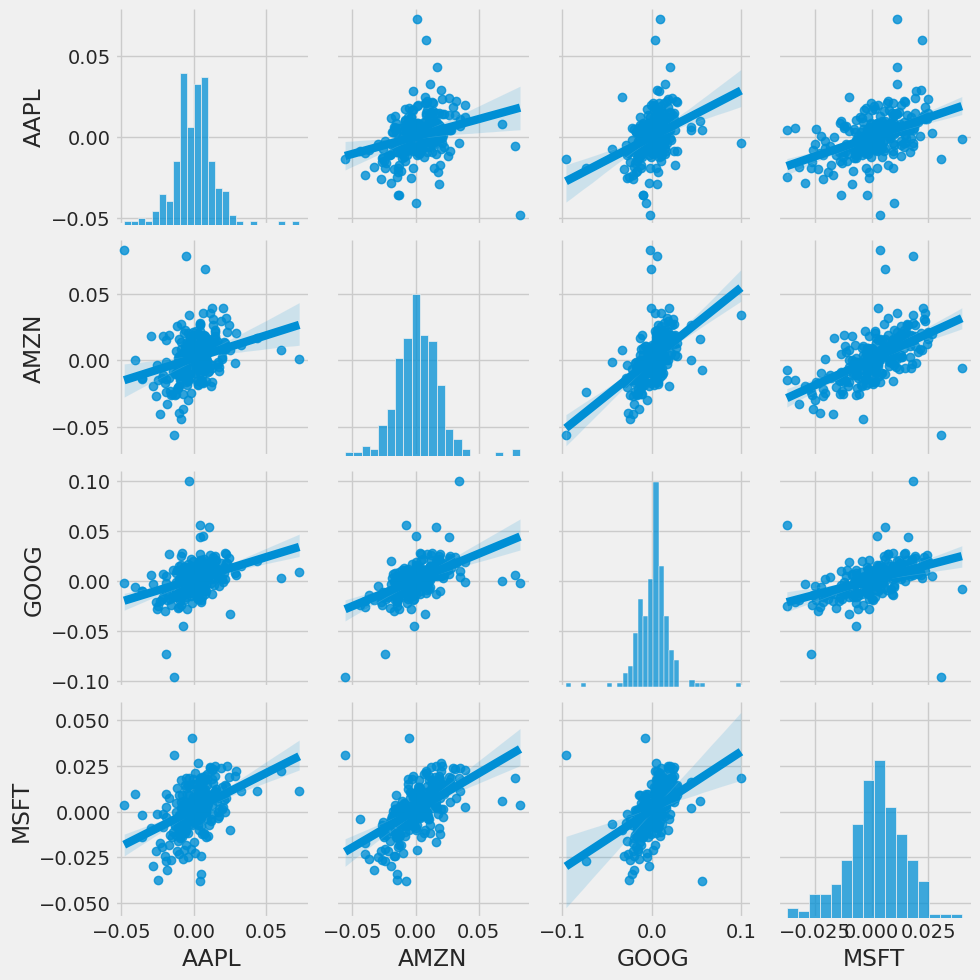

In [24]:
#for automatic Visual Analysis use pairplot()

sns.pairplot(tech_rets, kind='reg')

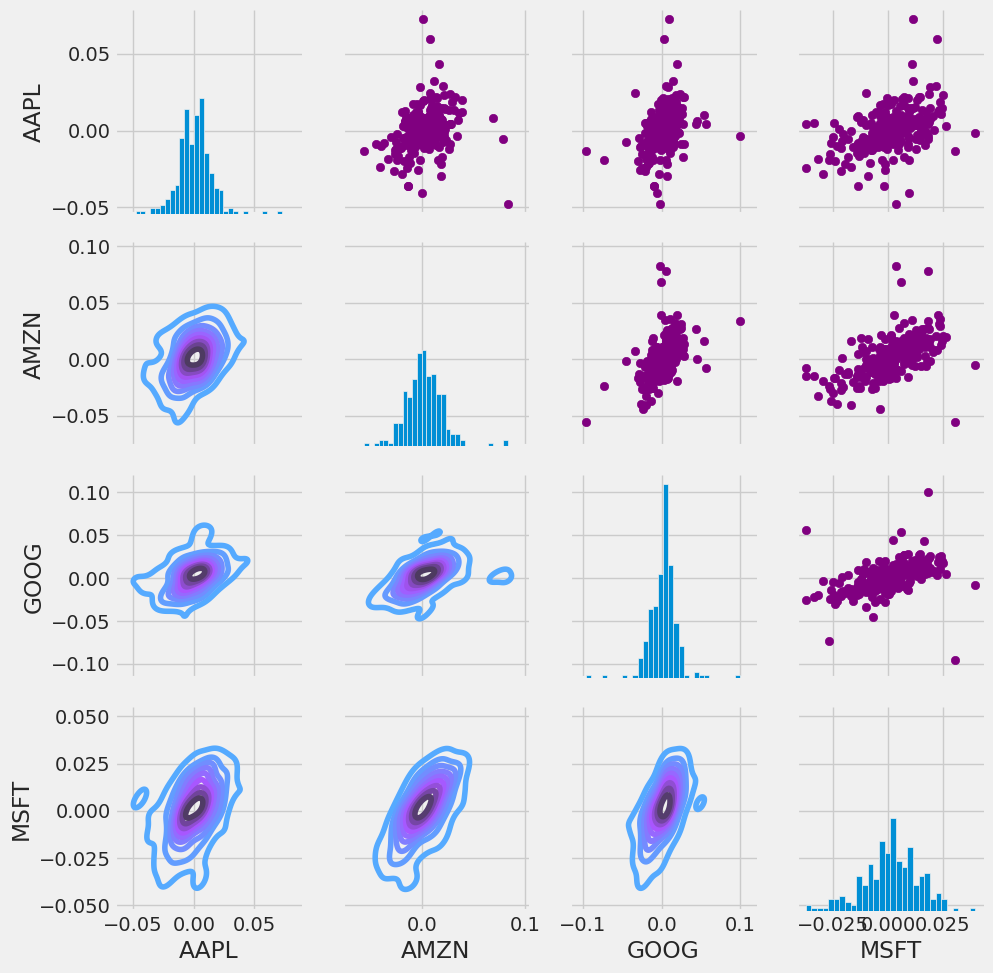

In [25]:
#using PairGrid() for full control of the fig
#set up fig by naming it return_fig

return_fig = sns.PairGrid(tech_rets.dropna())

#use map_upper to specify the upper triangle

return_fig.map_upper(plt.scatter, color='purple')

#use map_lower to specify the lower triangle

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#use map_diag to specify the daily returns
return_fig.map_diag(plt.hist, bins=30)



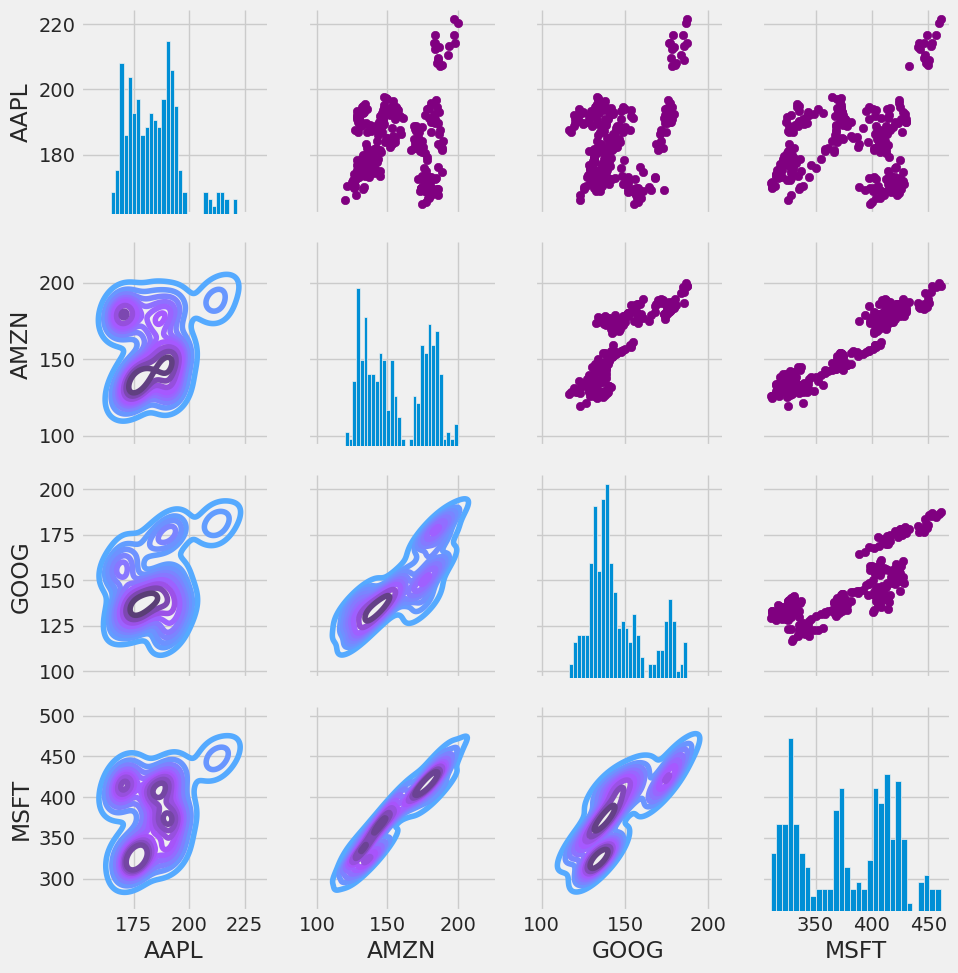

In [26]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

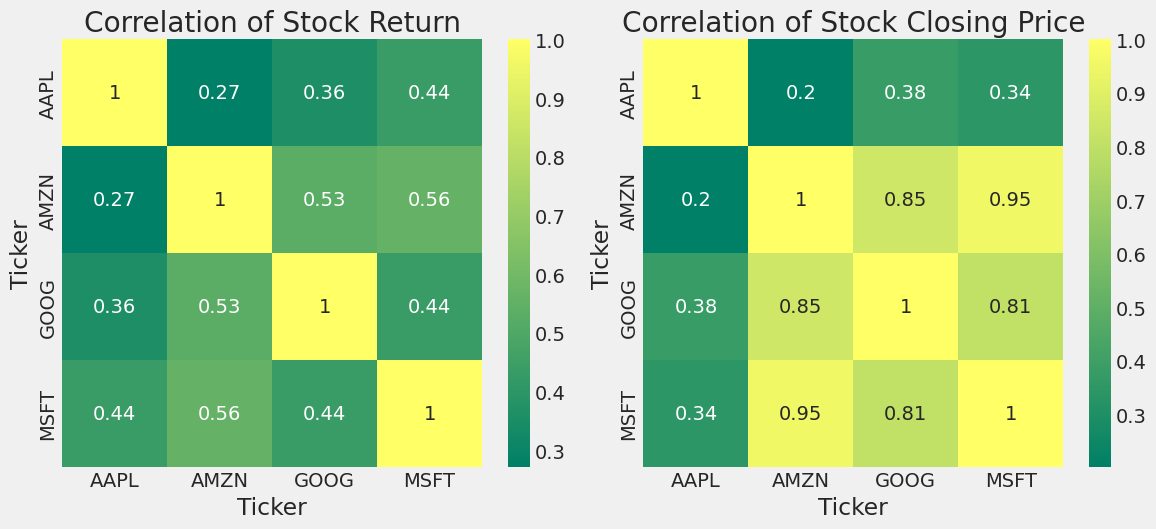

In [27]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Price')
plt.tight_layout()

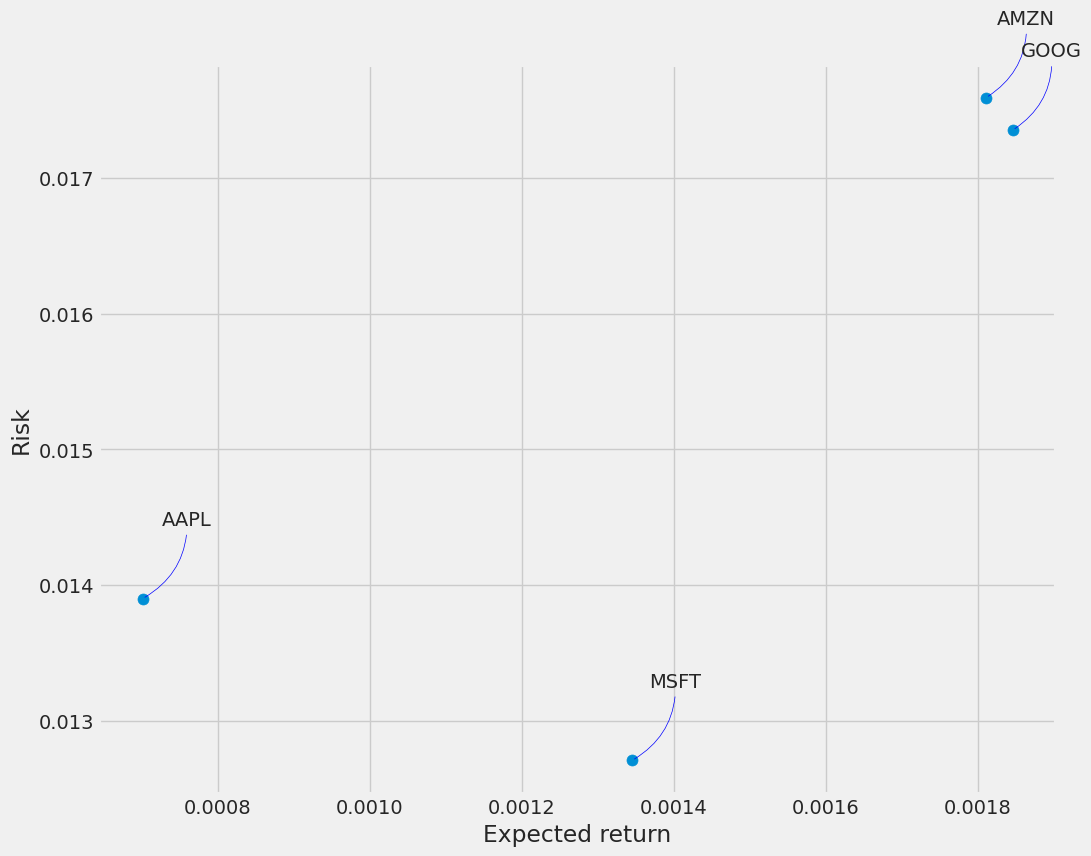

In [28]:
#Putting values to invest in a particular stock

#There are many ways we can quantify risk, one of the most basic ways using the information we have gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

rets = tech_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(11, 9))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [29]:
#Predicting the closing price stock price of APPLE inc

df = pdr.get_data_yahoo('AAPL', start='2012-01-03', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416985,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483711,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622307,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754257,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400
...,...,...,...,...,...,...
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900


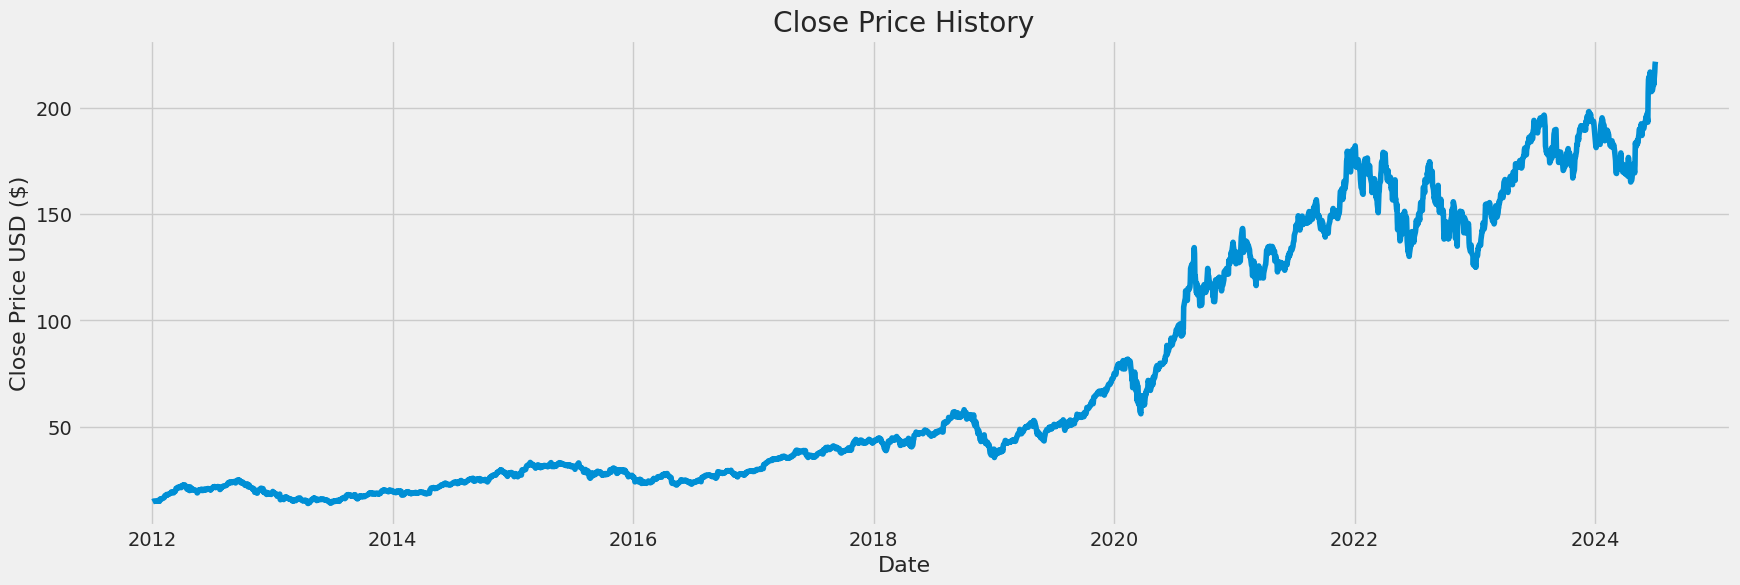

In [30]:
plt.figure(figsize=(19,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()


In [31]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


2988

In [32]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00356106],
       [0.00394125],
       [0.00473088],
       ...,
       [0.97687888],
       [0.99383438],
       [1.        ]])

In [33]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00356106, 0.00394125, 0.00473088, 0.00548266, 0.0053674 ,
       0.00562717, 0.00550846, 0.00530891, 0.00503709, 0.00587833,
       0.006637  , 0.00640303, 0.00512139, 0.00634454, 0.00514032,
       0.00965616, 0.00930694, 0.00976282, 0.01074856, 0.01134551,
       0.01129562, 0.01111155, 0.01189602, 0.01263403, 0.01347011,
       0.01482056, 0.01765737, 0.01770038, 0.01927964, 0.02045977,
       0.01843152, 0.01921254, 0.01919706, 0.02138703, 0.02107565,
       0.02165195, 0.02268758, 0.0232639 , 0.02492401, 0.02613338,
       0.02648261, 0.02660476, 0.02453694, 0.02403804, 0.02411201,
       0.02605598, 0.02660304, 0.02777802, 0.03054773, 0.03424298,
       0.03355141, 0.03355313, 0.03622479, 0.03706087, 0.03646563,
       0.03592202, 0.03535603, 0.03723633, 0.03852658, 0.03906676])]
[0.037731788873641606]

[array([0.00356106, 0.00394125, 0.00473088, 0.00548266, 0.0053674 ,
       0.00562717, 0.00550846, 0.00530891, 0.00503709, 0.00587833,
       0.006637  , 0.00640303, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


 156/2928 [>.............................] - ETA: 2:23 - loss: 0.0036

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid